In [1]:
# Run this block and make sure it is successful.
import numpy as np  # used for handling mathematical operations easier in python
import tensorflow as tf  # used for creating and training machine learning models 
from tensorflow import keras # Keras contains the mnist dataset
from matplotlib import pyplot as plt  # library that helps us visualize data by creating plots 
import seaborn as sn # visualization library for creating more complex graphs

2024-11-20 17:05:17.300316: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-20 17:05:17.306111: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-20 17:05:17.328752: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732140317.367557    6777 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732140317.376560    6777 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-20 17:05:17.410194: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
#TODO: Add the split data line here
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


The plot represents the number 9


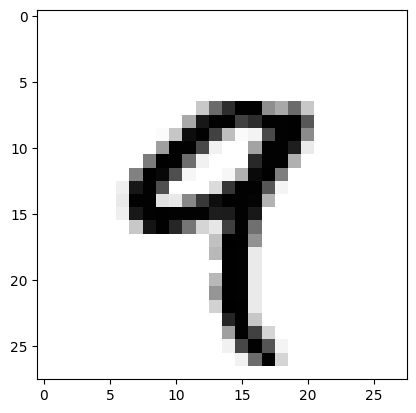

In [6]:
def plotImage(index,x_train,x_test,y_train):
    # Normalize the values so they are a decimal between 0 and 1
    x_train = x_train/255
    x_test = x_test/255
    print(f'The plot represents the number {y_train[index]}')
    plt.imshow(x_train[index],cmap = plt.cm.binary )
    plt.show()


#TODO: change the index to see other values in the dataset
plotImage(4, x_train, x_test, y_train)

In [7]:
# TODO: Add reshape the data in this code block

x_train_flat = x_train.reshape(len(x_train), 784)
x_test_flat = x_test.reshape(len(x_test), 784)

In [8]:
# Model creation
model = keras.Sequential([
    keras.layers.Dense(128, input_shape = (784,),activation='relu'), 
    keras.layers.Dense(64, activation='sigmoid'), 
    keras.layers.Dense(32, activation='sigmoid'), 
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile (
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

/home/jcres/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1732140619.138001    6777 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
# TODO: Train the model using model.fit here 
model.fit(x_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7352 - loss: 1.1029
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9050 - loss: 0.3308
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9120 - loss: 0.2935
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9198 - loss: 0.2658
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9260 - loss: 0.2494


In [10]:
# TODO: Test the model against the test data using model.evaluate
model.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9169 - loss: 0.2583


[0.22735722362995148, 0.9276999831199646]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


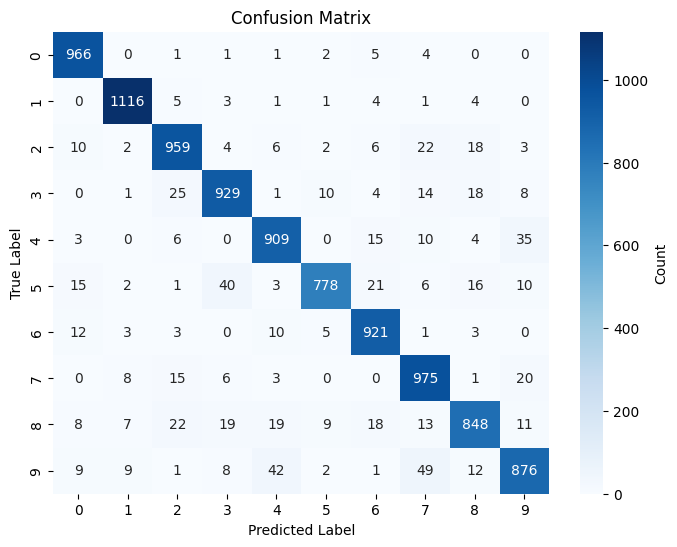

In [11]:
# TODO: Run the confusion matrix
def plot_confusion_matrix(model, x_test_flat, y_test):
    # Make predictions
    y_pred = model.predict(x_test_flat)
    y_pred_labels = [np.argmax(i) for i in y_pred]
    # Create confusion matrix
    confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sn.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# TODO: Uncomment out the line below and run the code block
plot_confusion_matrix(model,x_test_flat,y_test)